# Machine Learning Applied to Neuroscience and Neuroimaging
## Titile: Brain tumor classification based on magnetic resonance imaging using convolutional neural networks (CNN)
### Authors: Milena Biernacka, Agata Dratwa, Patrycja Lewczuk, Kornelia Susz


Original dataset source: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?fbclid=IwAR1jifRrna5JdMzLh4ifE56-mU8pwP9QSf3MQFa2d0CADGfqpcuj7EgTffE


In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import keras
# from keras.models import Sequential
# from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
# from sklearn.metrics import classification_report
# import ipywidgets as widgets
# import io
# import os
# from PIL import Image
# import tqdm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import cv2
# from sklearn.utils import shuffle
# import tensorflow as tf
# from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To be able to load dataset ypu have to have it on your google drive (path: /content/drive/MyDrive/MLATNAN). Inside directories Testing and Training:
# https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?fbclid=IwAR1jifRrna5JdMzLh4ifE56-mU8pwP9QSf3MQFa2d0CADGfqpcuj7EgTffE

file_path = '/content/drive/MyDrive/MLATNAN'

for dirname, _, filenames in os.walk(file_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(1).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(11).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(100).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(10).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(26).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(46).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(24).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(29).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(44).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(27).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(15).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(48).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(37).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(18).jpg
/content/drive/MyDrive/MLATNAN/Testing/glioma_tumor/image(3).jpg
/content/dr

### Metrics function

In [ ]:
def get_classification_metrics(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    # Metrics calculations
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    confusion = confusion_matrix(y_true, y_pred)

    # Creating dictionary with all metrics
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Confusion Matrix': confusion
    }

    return metrics

# Dataset: Brain Tumor Classification
https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/

Different perspectives

In [ ]:
def read_dataset_multiple_classes(path_test, path_train, img_size, img_labels):
  X_train = [] #images
  Y_train = [] #labels
  X_test = []
  Y_test = []
  image_size = img_size

  # list of tumor types in dataset
  labels = img_labels

  # iterating through every subfolder and reading images
  for i in labels:
      folderPath = os.path.join(path_train, i)
      for j in os.listdir(folderPath):
          img = cv2.imread(os.path.join(folderPath,j))
          img = cv2.resize(img,(image_size,image_size))
          X_train.append(img)
          Y_train.append(i)

  for i in labels:
      folderPath = os.path.join(path_test,i)
      for j in os.listdir(folderPath):
          img = cv2.imread(os.path.join(folderPath,j))
          img = cv2.resize(img,(image_size,image_size))
          X_test.append(img)
          Y_test.append(i)

  X_train = np.array(X_train)
  Y_train = np.array(Y_train)
  X_test = np.array(X_test)
  Y_test = np.array(Y_test)
  return (X_train,Y_train, X_test, Y_test)

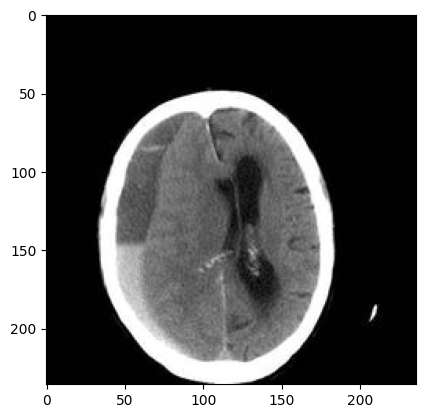

In [ ]:
img = cv2.imread('/content/drive/MyDrive/MLATNAN/Testing/no_tumor/image(1).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [ ]:
# reading data
X_test, Y_test, X_train, Y_train = read_dataset_multiple_classes('../content/drive/MyDrive/MLATNAN/Training','../content/drive/MyDrive/MLATNAN/Testing', 256, ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])

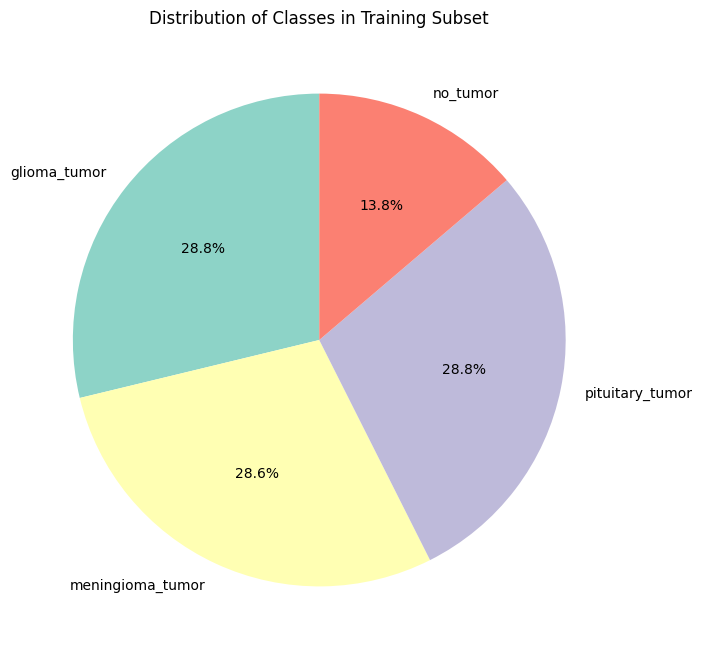

In [ ]:
import matplotlib.pyplot as plt

label_counts = {label: list(Y_train).count(label) for label in set(Y_train)}

plt.figure(figsize=(8, 8))
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

plt.title('Distribution of Classes in Training Subset')

plt.show()


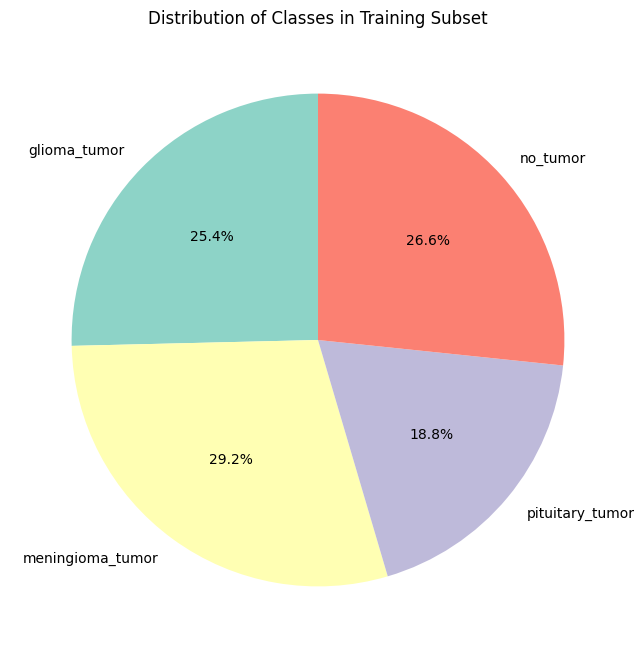

In [ ]:
import matplotlib.pyplot as plt

label_counts = {label: list(Y_test).count(label) for label in set(Y_test)}

plt.figure(figsize=(8, 8))
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

plt.title('Distribution of Classes in Training Subset')

plt.show()


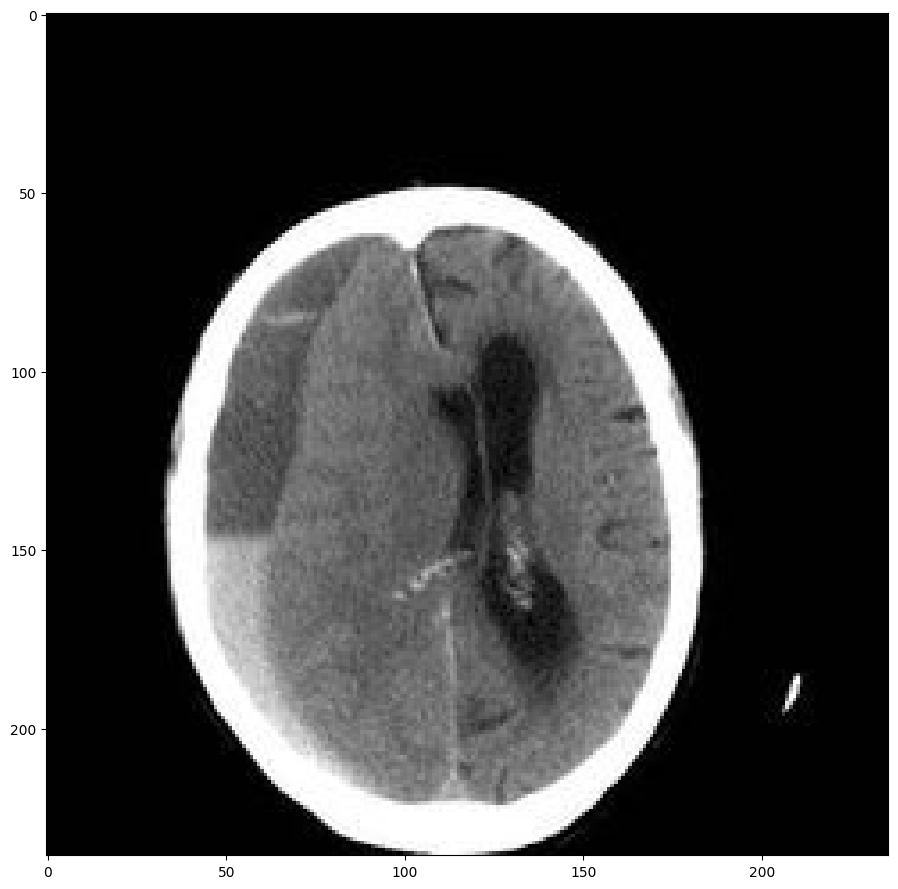

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
plt.imshow(img, cmap='gray')
# axs.matshow(image)
plt.show()

Let's have a look at the dataset:

In [ ]:
# Changing labels glioma_tumor, meningioma_tumor... to 0, 1, 2, 3
def change_labels_to_numbers(labels, y_train, y_test):
  y_train_new = []
  for i in y_train:
      y_train_new.append(labels.index(i))
  y_train=y_train_new
  y_train = tf.keras.utils.to_categorical(y_train)

  y_test_new = []
  for i in y_test:
      y_test_new.append(labels.index(i))
  y_test=y_test_new
  y_test = tf.keras.utils.to_categorical(y_test)
  return (y_train, y_test)

In [ ]:
y_train, y_test = change_labels_to_numbers(['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'], Y_train, Y_test)

In [ ]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

Defining the model:

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 126, 126, 64)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 122, 122, 64)      36928     
                                                      

In [ ]:
# compiling model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
# training model
model.fit(X_train,y_train,epochs=60,validation_split=0.1)

Epoch 1/60
81/81 [==============================] - 32s 355ms/step - loss: 2.7764 - accuracy: 0.3504 - val_loss: 1.2664 - val_accuracy: 0.7596
Epoch 2/60
81/81 [==============================] - 28s 340ms/step - loss: 1.0460 - accuracy: 0.5381 - val_loss: 1.2181 - val_accuracy: 0.4983
Epoch 3/60
81/81 [==============================] - 27s 338ms/step - loss: 0.8638 - accuracy: 0.6310 - val_loss: 0.7802 - val_accuracy: 0.8502
Epoch 4/60
81/81 [==============================] - 28s 342ms/step - loss: 0.7118 - accuracy: 0.6922 - val_loss: 0.5617 - val_accuracy: 0.9059
Epoch 5/60
81/81 [==============================] - 27s 339ms/step - loss: 0.6223 - accuracy: 0.7476 - val_loss: 0.9309 - val_accuracy: 0.6690
Epoch 6/60
81/81 [==============================] - 28s 343ms/step - loss: 0.5074 - accuracy: 0.7902 - val_loss: 0.9425 - val_accuracy: 0.7073
Epoch 7/60
81/81 [==============================] - 28s 341ms/step - loss: 0.4427 - accuracy: 0.8254 - val_loss: 0.4368 - val_accuracy: 0.8641

In [ ]:
# saving model
model.save("model.h1")

In [ ]:
saved_model1 = keras.models.load_model("model.h1")

In [ ]:
y_pred = model.predict(X_test)
y_pred

13/13 [==============================] - 1s 64ms/step


array([[1.83404339e-07, 1.77859358e-04, 9.99821961e-01, 4.07960883e-08],
       [2.02069699e-04, 9.82086539e-01, 8.85342341e-03, 8.85795429e-03],
       [7.40223676e-02, 3.85261297e-01, 4.00012881e-01, 1.40703499e-01],
       ...,
       [1.02185895e-05, 1.02759499e-04, 9.25552168e-09, 9.99886990e-01],
       [3.35089317e-06, 2.50445143e-03, 6.59485580e-04, 9.96832669e-01],
       [6.30359306e-11, 6.07053821e-08, 7.95719668e-09, 9.99999881e-01]],
      dtype=float32)

In [ ]:
metrics = get_classification_metrics(y_pred, y_test)
metrics

{'Accuracy': 0.751269035532995,
 'Precision': 0.7403936545240892,
 'Recall': 0.8336167656253137,
 'F1-score': 0.7051753274186735,
 'Confusion Matrix': array([[ 20,   0,   0,   0],
        [ 33, 114,   0,   8],
        [ 43,   1, 105,   9],
        [  4,   0,   0,  57]])}

In [ ]:
def draw_confusion_matrix(conf_matrix, labels):

  fig, ax = plt.subplots(figsize=(6, 6))
  ax.matshow(conf_matrix, cmap='PuRd', alpha=0.5, )

  ax.set_xticks(range(len(labels)))
  ax.set_yticks(range(len(labels)))
  ax.set_xticklabels(labels, fontsize=8)
  ax.set_yticklabels(labels, fontsize=8)

  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='large')

  plt.grid(False)
  plt.xlabel('Predicted', fontsize=12)
  plt.ylabel('Actual', fontsize=12)
  plt.title('Confusion Matrix', fontsize=15)
  plt.show()


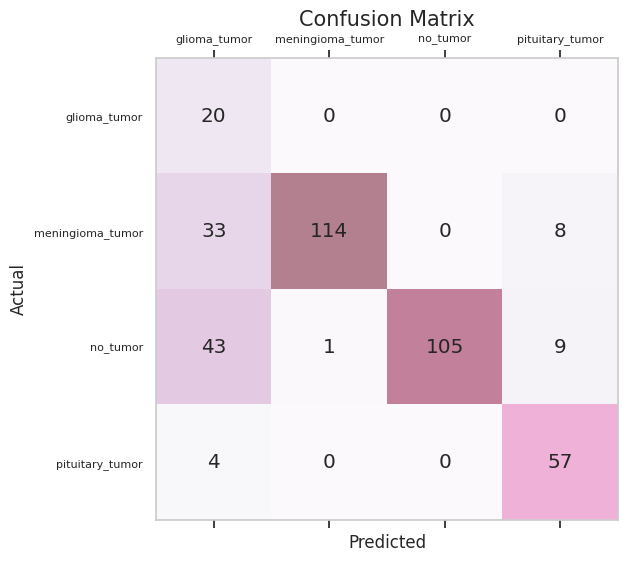

In [ ]:
labels_all = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
draw_confusion_matrix(metrics['Confusion Matrix'], labels_all)

# Changing to binary classification

In [ ]:
def read_dataset_binary_classes(path_train, path_test, img_size, img_labels):
  X = [] #images
  Y = [] #labels

  image_size = img_size

  # list of tumor types in dataset
  labels = img_labels

  # iterating through every subfolder and reading images
  for label in labels:
      folderPath = os.path.join(path_train, label)
      for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        if label == "no_tumor":
          Y.append("no")
        else:
          Y.append("yes")

  for label in labels:
      folderPath = os.path.join(path_test,label)
      for j in os.listdir(folderPath):
          img = cv2.imread(os.path.join(folderPath,j))
          img = cv2.resize(img,(image_size,image_size))
          X.append(img)
          if label == "no_tumor":
            Y.append("no")
          else:
            Y.append("yes")

  X = np.array(X)
  Y = np.array(Y)
  return (X,Y)

In [ ]:
X_bin, Y_bin = read_dataset_binary_classes('../content/drive/MyDrive/MLATNAN/Training','../content/drive/MyDrive/MLATNAN/Testing', 256, ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])

In [ ]:
# shuffling data
X_bin,Y_bin = shuffle(X_bin,Y_bin,random_state=42)

In [ ]:
Y_bin = pd.Series(Y_bin,name='Tumor_Status')
Y_bin = pd.get_dummies(Y_bin)

In [ ]:
Y_bin

,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
3259,0,1
3260,0,1
3261,0,1
3262,0,1


In [ ]:
X_bin

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        ...,

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [ ]:
print(X_bin.shape)
print(Y_bin.shape)

(3264, 256, 256, 3)
(3264, 2)


In [ ]:
Y_bin['yes'].sum()

2764

In [ ]:
Y_bin['yes']

0       1
1       1
2       1
3       1
4       1
       ..
3259    1
3260    1
3261    1
3262    1
3263    0
Name: yes, Length: 3264, dtype: uint8

In [ ]:
# Splitting dataset
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin,Y_bin,test_size=0.1,random_state=42)

In [ ]:
y_bin_test

,no,yes
1641,0,1
134,0,1
411,0,1
203,0,1
889,0,1
...,...,...
538,0,1
746,0,1
1811,0,1
1124,1,0


In [ ]:
y_bin_test['yes'].sum()

278

In [ ]:
print(X_bin_train.shape)
print(y_bin_train.shape)

(2937, 256, 256, 3)
(2937, 2)


In [ ]:
print(X_bin_test.shape)
print(y_bin_test.shape)

(327, 256, 256, 3)
(327, 2)


In [ ]:
# X_bin_train = X_bin_train.reshape(-1,256, 256,1)
# X_bin_test = X_bin_test.reshape(-1,256, 256,1)

In [ ]:
print(X_bin_train.shape)
print(X_bin_test.shape)

(2937, 256, 256, 3)
(327, 256, 256, 3)


In [ ]:
model_bin = Sequential()
model_bin.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(256,256,3)))
model_bin.add(Conv2D(64,(3,3),activation='relu'))
model_bin.add(MaxPooling2D(2,2))
model_bin.add(Dropout(0.3))
model_bin.add(Conv2D(64,(3,3),activation='relu'))
model_bin.add(Conv2D(64,(3,3),activation='relu'))
model_bin.add(Dropout(0.3))
model_bin.add(MaxPooling2D(2,2))
model_bin.add(Dropout(0.3))
model_bin.add(Conv2D(128,(3,3),activation='relu'))
model_bin.add(Conv2D(128,(3,3),activation='relu'))
model_bin.add(Conv2D(128,(3,3),activation='relu'))
model_bin.add(MaxPooling2D(2,2))
model_bin.add(Dropout(0.3))
model_bin.add(Conv2D(128,(3,3),activation='relu'))
model_bin.add(Conv2D(256,(3,3),activation='relu'))
model_bin.add(MaxPooling2D(2,2))
model_bin.add(Dropout(0.3))
model_bin.add(Flatten())
model_bin.add(Dense(512,activation = 'relu'))
model_bin.add(Dense(512,activation = 'relu'))
model_bin.add(Dropout(0.3))
model_bin.add(Dense(2,activation='sigmoid'))

In [ ]:
model_bin.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 126, 126, 64)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 122, 122, 64)      36928     
                                                      

In [ ]:
model_bin.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# X_train,y_train
# print(X_train.shape)
# print(y_train.shape)
# print(X_bin_train.shape)
# print(y_bin_train.shape)

In [ ]:
model_bin.fit(X_bin_train, y_bin_train, validation_data = (X_bin_test, y_bin_test), epochs = 60)

Epoch 1/60
92/92 [==============================] - 46s 457ms/step - loss: 1.2695 - accuracy: 0.8121 - val_loss: 0.4256 - val_accuracy: 0.8502
Epoch 2/60
92/92 [==============================] - 30s 329ms/step - loss: 0.4286 - accuracy: 0.8464 - val_loss: 0.4244 - val_accuracy: 0.8502
Epoch 3/60
92/92 [==============================] - 30s 331ms/step - loss: 0.3894 - accuracy: 0.8464 - val_loss: 0.4890 - val_accuracy: 0.8502
Epoch 4/60
92/92 [==============================] - 30s 331ms/step - loss: 0.3567 - accuracy: 0.8512 - val_loss: 0.4916 - val_accuracy: 0.8563
Epoch 5/60
92/92 [==============================] - 30s 330ms/step - loss: 0.2957 - accuracy: 0.8767 - val_loss: 0.3579 - val_accuracy: 0.8777
Epoch 6/60
92/92 [==============================] - 30s 331ms/step - loss: 0.2505 - accuracy: 0.8853 - val_loss: 0.3307 - val_accuracy: 0.8593
Epoch 7/60
92/92 [==============================] - 30s 331ms/step - loss: 0.2179 - accuracy: 0.9013 - val_loss: 0.7584 - val_accuracy: 0.4862

In [ ]:
y_pred = np.argmax(model_bin.predict(X_bin_test), axis=1)
print(classification_report(y_bin_test['yes'], y_pred))

11/11 [==============================] - 1s 54ms/step
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        49
           1       0.95      0.93      0.94       278

    accuracy                           0.90       327
   macro avg       0.79      0.82      0.81       327
weighted avg       0.90      0.90      0.90       327



In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
conf_matr = confusion_matrix(y_bin_test['yes'], y_pred)
conf_matr

array([[ 35,  14],
       [ 20, 258]])

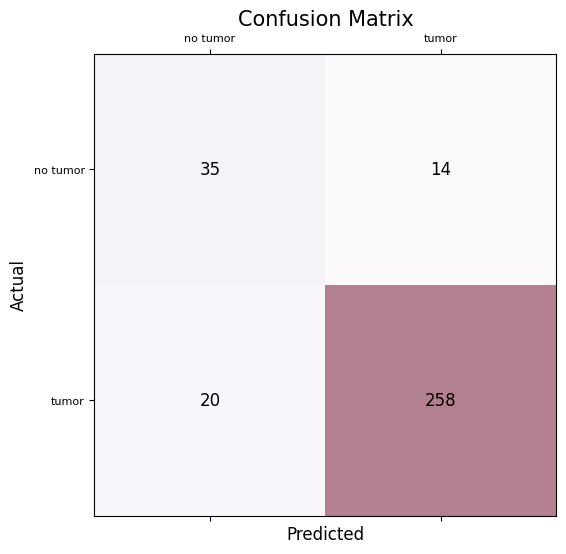

In [ ]:
labels_bin = ['no tumor', 'tumor']
draw_confusion_matrix(conf_matr, labels_bin)

### Modifying images

In [ ]:
def apply_blur(image):
    return cv2.GaussianBlur(image, (15, 15), 0)

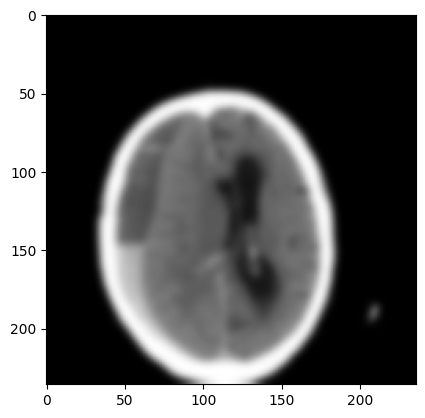

In [ ]:
blur = apply_blur(img)
plt.imshow(blur, cmap='gray')

In [ ]:
# Function to modify pixel resolution
def modify_resolution(image):
    resized = cv2.resize(image, (image.shape[1] // 5, image.shape[0] // 5))
    modified_resolution = cv2.resize(resized, (image.shape[1], image.shape[0]))
    return resized

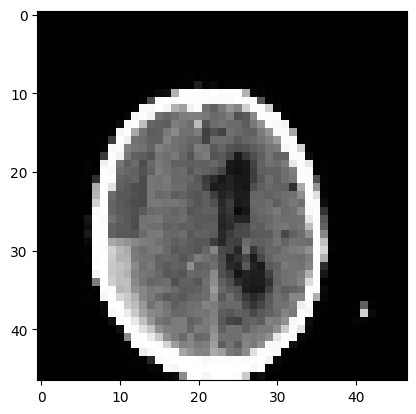

In [ ]:
modified_resolution = modify_resolution(img)
plt.imshow(modified_resolution, cmap='gray')

### Training on original data and testing on modified

In [ ]:
# Function to modify pixel resolution
def modify_resolution(image):
    resized = cv2.resize(image, (image.shape[1] // 5, image.shape[0] // 5))
    modified_resolution = cv2.resize(resized, (image.shape[1], image.shape[0]))
    return modified_resolution

# Function to apply blur effect
def apply_blur(image):
    return cv2.GaussianBlur(image, (15, 15), 0)  # Adjust kernel size for desired blur strength

def read_and_modify_dataset_multiple_classes(path_train, path_test, img_size, img_labels):
    X_train = []  # Train images
    Y_train = []  # Train labels
    X_test = []
    Y_test = []
    image_size = img_size

    # List of tumor types in the dataset
    labels = img_labels
    k = 0
    n=0
    # Read and shuffle train data
    for i in labels:
        folderPath = os.path.join(path_train, i)
        images = os.listdir(folderPath)
        images = shuffle(images)  # Shuffle the images within each class
        half = len(images) // 2  # Splitting shuffled train data into halves

        for idx, j in enumerate(images):
            img = cv2.imread(os.path.join(folderPath, j))
            img = cv2.resize(img, (image_size, image_size))

            # Modify the second half of shuffled train data
            if idx >= half:
                quarter = (len(images) - half) // 2  # Splitting the remaining into quarters
                if idx - half < quarter:  # Modify pixel resolution for one quarter
                    k+=1
                    img = modify_resolution(img)
                else:  # Apply blur for the other quarter
                    n+=1
                    img = apply_blur(img)

            X_train.append(img)
            Y_train.append(i)

    for i in labels:
      folderPath = os.path.join(path_test,i)
      for j in os.listdir(folderPath):
          img = cv2.imread(os.path.join(folderPath,j))
          img = cv2.resize(img,(image_size,image_size))
          X_test.append(img)
          Y_test.append(i)

    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)

    return X_train, Y_train, X_test, Y_test


In [ ]:
X_test_modified, Y_test_modified, X_train_normal, Y_train_normal = read_and_modify_dataset_multiple_classes('../content/drive/MyDrive/MLATNAN/Testing','../content/drive/MyDrive/MLATNAN/Training', 256, ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])

In [ ]:
Y_train_normal, Y_test_modified = change_labels_to_numbers(['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'], Y_train_normal, Y_test_modified)

In [ ]:
# training model
model.fit(X_train_normal,Y_train_normal,epochs=60,validation_split=0.1)

Epoch 1/60
81/81 [==============================] - 39s 484ms/step - loss: 1.0928 - accuracy: 0.5606 - val_loss: 0.3644 - val_accuracy: 0.9408
Epoch 2/60
81/81 [==============================] - 27s 329ms/step - loss: 0.7419 - accuracy: 0.6864 - val_loss: 1.2365 - val_accuracy: 0.4530
Epoch 3/60
81/81 [==============================] - 26s 327ms/step - loss: 0.5797 - accuracy: 0.7573 - val_loss: 0.6222 - val_accuracy: 0.7840
Epoch 4/60
81/81 [==============================] - 27s 329ms/step - loss: 0.4215 - accuracy: 0.8300 - val_loss: 1.0615 - val_accuracy: 0.6585
Epoch 5/60
81/81 [==============================] - 27s 329ms/step - loss: 0.3247 - accuracy: 0.8664 - val_loss: 0.4613 - val_accuracy: 0.8537
Epoch 6/60
81/81 [==============================] - 26s 327ms/step - loss: 0.2817 - accuracy: 0.8897 - val_loss: 0.8028 - val_accuracy: 0.6829
Epoch 7/60
81/81 [==============================] - 27s 328ms/step - loss: 0.2045 - accuracy: 0.9187 - val_loss: 0.7586 - val_accuracy: 0.7456

In [ ]:
metrics_modified = get_classification_metrics(model.predict(X_test_modified), Y_test_modified)
metrics_modified

13/13 [==============================] - 2s 161ms/step


{'Accuracy': 0.733502538071066,
 'Precision': 0.7241840132057524,
 'Recall': 0.7314202589432719,
 'F1-score': 0.6992337545524998,
 'Confusion Matrix': array([[ 27,   1,   9,   3],
        [ 29, 111,   1,  12],
        [ 31,   2,  95,   3],
        [ 13,   1,   0,  56]])}

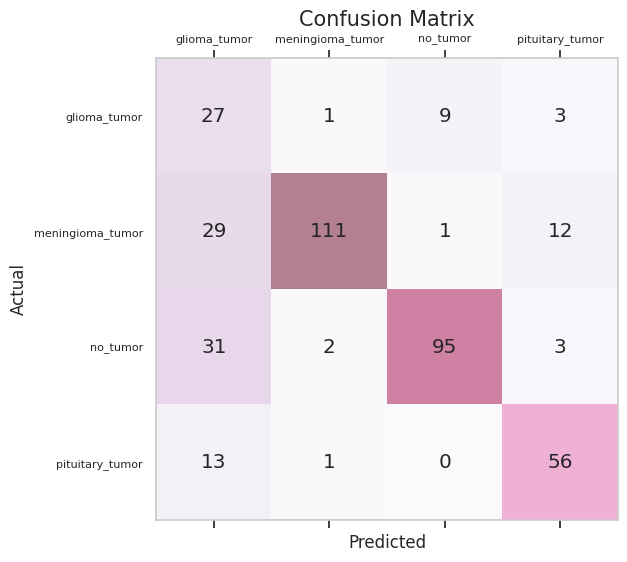

In [ ]:
draw_confusion_matrix(metrics_modified['Confusion Matrix'], labels_all)

In [ ]:
# to nie działa po to tylko dla modeli uczenia, dla sieci nie działa :C
# from sklearn.metrics import roc_auc_score

# y_pred = model.predict_proba(X_train_normal)
# y_pred = np.transpose([pred[:, 1] for pred in y_pred])
# roc_auc_score(Y_train_normal, y_pred, average=None)

# roc_auc_score(Y_train_normal, model.decision_function(X_train_normal), average=None)

13/13 [==============================] - 1s 55ms/step


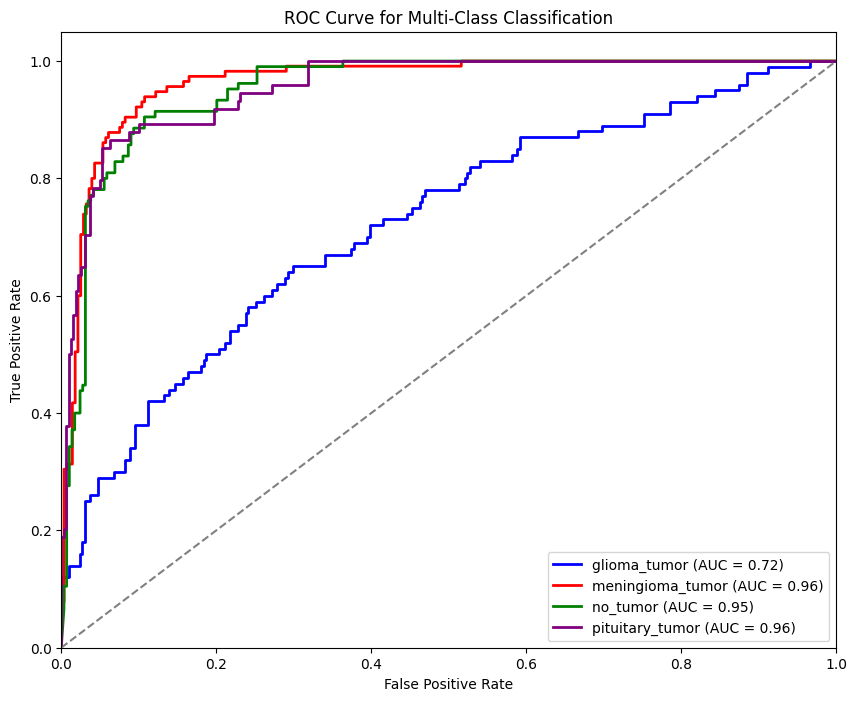

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

probabilities = model.predict(X_test_modified)

Y_test_binary_modified = label_binarize(Y_test_modified, classes=class_names)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binary_modified[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple']

for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


### Training on modified data and testing on normal

In [ ]:
X_train_modified, Y_train_modified, X_test_normal, Y_test_normal = read_and_modify_dataset_multiple_classes('../content/drive/MyDrive/MLATNAN/Training','../content/drive/MyDrive/MLATNAN/Testing', 256, ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])

In [ ]:
Y_train_modified, Y_test_normal = change_labels_to_numbers(['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'], Y_train_modified, Y_test_normal)

In [ ]:
# training model
model.fit(X_train_modified,Y_train_modified,epochs=60,validation_split=0.1)

Epoch 1/60
81/81 [==============================] - 56s 474ms/step - loss: 3.2097 - accuracy: 0.3326 - val_loss: 1.2582 - val_accuracy: 0.7422
Epoch 2/60
81/81 [==============================] - 26s 323ms/step - loss: 1.0553 - accuracy: 0.5219 - val_loss: 1.0309 - val_accuracy: 0.6655
Epoch 3/60
81/81 [==============================] - 27s 331ms/step - loss: 0.9093 - accuracy: 0.5958 - val_loss: 1.8700 - val_accuracy: 0.1498
Epoch 4/60
81/81 [==============================] - 27s 335ms/step - loss: 0.7806 - accuracy: 0.6663 - val_loss: 1.4161 - val_accuracy: 0.4460
Epoch 5/60
81/81 [==============================] - 27s 327ms/step - loss: 0.7189 - accuracy: 0.6953 - val_loss: 2.3133 - val_accuracy: 0.1429
Epoch 6/60
81/81 [==============================] - 27s 330ms/step - loss: 0.6122 - accuracy: 0.7395 - val_loss: 4.1473 - val_accuracy: 0.0139
Epoch 7/60
81/81 [==============================] - 27s 332ms/step - loss: 0.5653 - accuracy: 0.7747 - val_loss: 1.3811 - val_accuracy: 0.5575

In [ ]:
metrics_modified2 = get_classification_metrics(model.predict(X_test_normal), Y_test_normal)
metrics_modified2

13/13 [==============================] - 2s 165ms/step


{'Accuracy': 0.7436548223350253,
 'Precision': 0.7267450058754406,
 'Recall': 0.7845306112130361,
 'F1-score': 0.6991499358253919,
 'Confusion Matrix': array([[ 24,   0,   0,   5],
        [ 31, 114,   0,   9],
        [ 39,   1, 105,  10],
        [  6,   0,   0,  50]])}

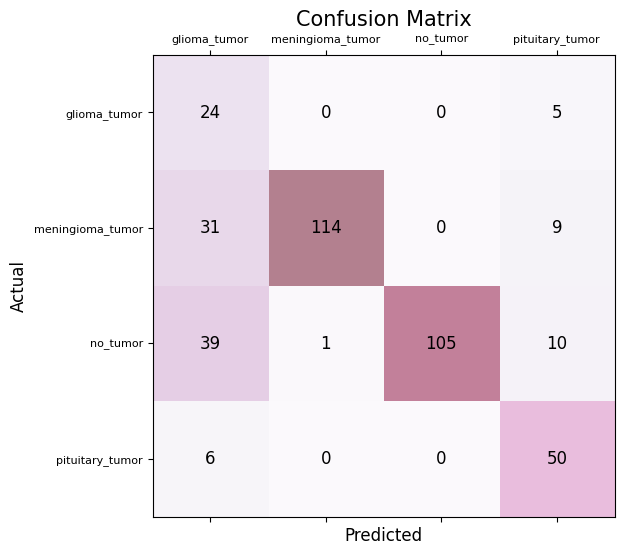

In [ ]:
labels_all = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
draw_confusion_matrix(metrics_modified2['Confusion Matrix'], labels_all)

13/13 [==============================] - 1s 60ms/step


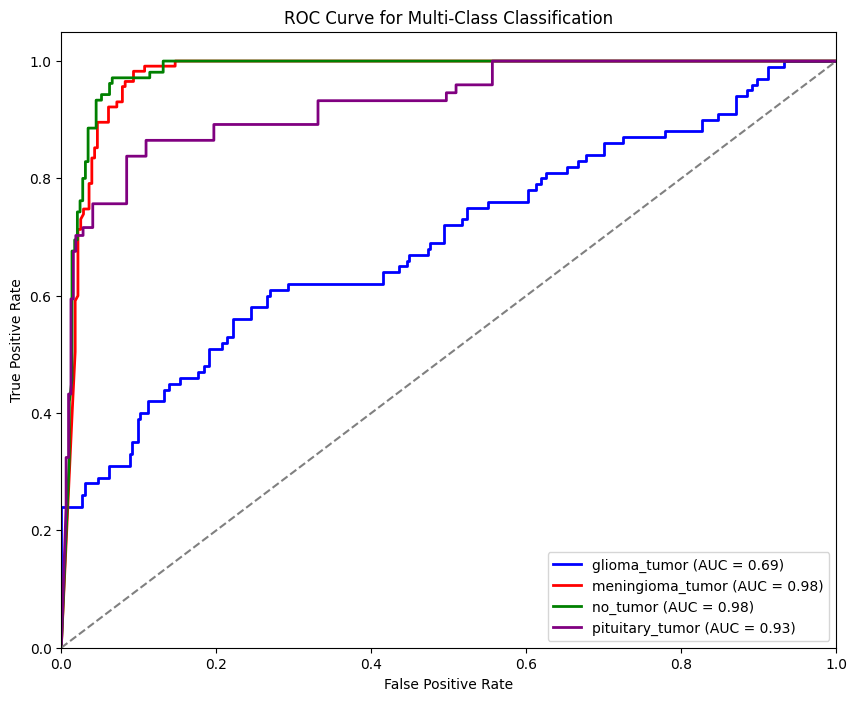

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

probabilities = model.predict(X_test_normal)

Y_test_binary_normal = label_binarize(Y_test_normal, classes=class_names)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binary_normal[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple']

for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()